# Roshan Maur

# Task 1 - Prediction using Supervised ML

In [4]:
# importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# importing the sklearn package

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# reading the csv file from github 

df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


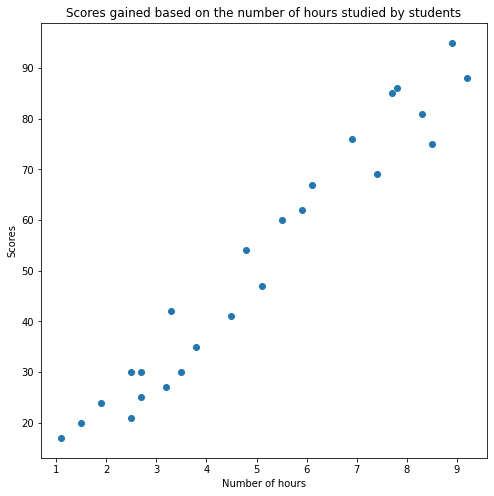

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(df["Hours"], df["Scores"])
plt.xlabel("Number of hours")
plt.ylabel("Scores")
plt.title("Scores gained based on the number of hours studied by students")
plt.show()

In [8]:
# Seperating the features and labels

X = df["Hours"]
y = df["Scores"]

In [9]:
# converting the X,y into numpy arrays

X = np.array(X)
y = np.array(y)

In [10]:
# using the famous train_test_split function to split into train and test sets with the test size being 0.15

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42)

In [11]:
# using the simple Linear Regression function from sklearn.linear_model to fit the training data

lr = LinearRegression(n_jobs=-1)
lr.fit(X_train.reshape(-1,1), y_train)
lr.score(X_train.reshape(-1,1), y_train)

0.9492854034186479

In [12]:
# predicting the X_test data to see if our model generalized properly

preds = lr.predict(X_test.reshape(-1,1))
preds

array([83.33366331, 27.09319812, 27.09319812, 69.75837861])

In [13]:
y_test

array([81, 30, 21, 76], dtype=int64)

In [14]:
# 96% score

lr.score(X_test.reshape(-1,1), y_test)

0.9685603135908576

In [15]:
# rmse score of 4.72 

np.sqrt(mean_squared_error(y_test, preds))

4.742899495639919

In [16]:
X_test = pd.DataFrame(X_test)
X_test.columns = ["x"]
X_test["y"] = y_test
X_test["preds"] = preds

In [17]:
X_test

,x,y,preds
0,8.3,81,83.333663
1,2.5,30,27.093198
2,2.5,21,27.093198
3,6.9,76,69.758379


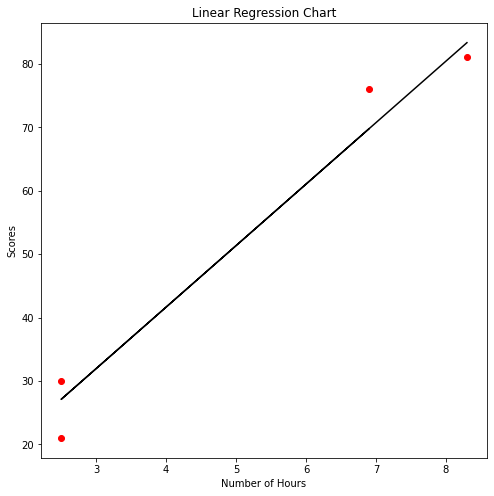

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(X_test["x"], X_test["y"], color="red")
plt.plot(X_test["x"], X_test["preds"], color="black")
plt.xlabel("Number of Hours")
plt.ylabel("Scores")
plt.title("Linear Regression Chart")
plt.show()

In [19]:
# predicting the score for a student who studies for 9.5 hours

X_new = np.array(9.25).reshape(-1,1)
lr.predict(X_new)

array([92.54546365])